In [1]:
import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import load_diabetes
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS

from sklearn.model_selection import train_test_split as tts

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(load_diabetes().data, columns = load_diabetes().feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
target = pd.Series(load_diabetes().target)

In [5]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [6]:
x_train,x_test,y_train,y_test = tts(df,target)

In [7]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [12]:
X = sm.add_constant(x_train)
modelo = OLS(y_train,X).fit()

In [13]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     32.98
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           1.19e-43
Time:                        09:56:41   Log-Likelihood:                -1780.1
No. Observations:                 331   AIC:                             3582.
Df Residuals:                     320   BIC:                             3624.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.7548      2.945     50.846      0.000     143.960     155.549
age          -16.0600     66.975     -0.240      0.811    -147.827     115.707
sex         -300.6492     70.505     -4.264      0.000    -439.360    -161.938
bmi          517.8641     74.657      6.937      0.000     370.983     664.745
bp           349.2204     73.480      4.753      0.000     204.655     493.786
s1          -471.3004    496.147     -0.950      0.343   -1447.423     504.823
s2           154.9799    411.093      0.377      0.706    -653.806     963.766
s3            20.3182    247.055      0.082      0.935    -465.738     506.375
s4           260.3385    196.958      1.322      0.187    -127.158     647.835
s5           569.9256    212.174      2.686      0.008     152.494     987.357
s6            72.6380     78.760      0.922      0.357     -82.315     227.591
==============================================================================
Omnibus:                        0.095   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.209
Skew:                          -0.005   Prob(JB):                        0.901
Kurtosis:                       2.878   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
from sklearn.preprocessing import StandardScaler

In [14]:
df_2  = df[['sex','bmi','bp','s1','s2','s5']]

In [37]:
scaler = StandardScaler()

In [ ]:
scaler.fit()

In [15]:
x_train,x_test,y_train,y_test = tts(df_2,target)

In [16]:
X = sm.add_constant(x_train)

In [17]:
modelo = OLS(y_train,X).fit()

In [18]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     64.37
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           2.44e-52
Time:                        10:07:44   Log-Likelihood:                -1781.1
No. Observations:                 331   AIC:                             3576.
Df Residuals:                     324   BIC:                             3603.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.3389      2.926     52.409      0.000     147.583     159.095
sex         -263.5593     67.036     -3.932      0.000    -395.440    -131.679
bmi          544.0196     73.020      7.450      0.000     400.367     687.672
bp           307.8486     73.267      4.202      0.000     163.710     451.987
s1          -684.8828    176.174     -3.888      0.000   -1031.472    -338.293
s2           451.2467    163.310      2.763      0.006     129.965     772.528
s5           846.0665     91.866      9.210      0.000     665.338    1026.795
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.619
Skew:                           0.039   Prob(JB):                        0.734
Kurtosis:                       2.803   Cond. No.                         83.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
sm.add_constant(y_test)

y_pred = modelo.predict(sm.add_constant(x_test))

In [22]:
from sklearn.metrics import mean_squared_error as mse

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [24]:
m = mse(y_test,y_pred)

In [25]:
m

3276.190288426403

In [26]:
y_test

417     55.0
356     54.0
322    242.0
212     73.0
321    230.0
       ...  
41      55.0
6      138.0
173    101.0
423     91.0
224     77.0
Length: 111, dtype: float64

In [27]:
y_pred

417    151.244570
356     94.858928
322    272.397580
212    157.773132
321    280.193721
          ...    
41      70.781306
6       72.440218
173     98.809187
423    147.377852
224     79.364604
Length: 111, dtype: float64

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [29]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

45.37054554100242

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [32]:
import math

In [33]:
rmse = math.sqrt(m)
rmse

57.23801436481181

![](data/r2.png)

![](data/r2adj.png)

In [38]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.40506813040075507

In [39]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC

In [40]:
data = load_wine()

In [41]:
x_train, x_test, y_train,y_test = tts(data.data, data.target)

In [42]:
svc = SVC(kernel = 'linear').fit(x_train,y_train)

y_pred = svc.predict(x_test)

In [43]:
y_test

array([2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2])

In [44]:
y_pred

array([2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2])

In [45]:
from sklearn.metrics import confusion_matrix

array([[10,  0,  0],
       [ 1, 18,  1],
       [ 0,  0, 15]], dtype=int64)

<AxesSubplot:>

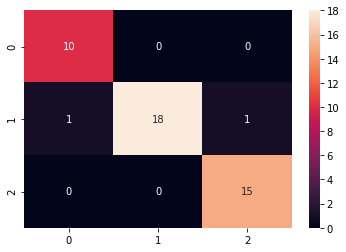

In [48]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


![](data/acc.png)

![](data/recall.png)

![](data/prec.png)

![](data/dclas.png)

In [50]:
from sklearn.metrics import accuracy_score as acc
#Accuracy
acc(y_test, y_pred) 

0.9555555555555556

In [51]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')



0.9488636363636364

In [52]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.9666666666666667

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![](data/roc.png)

In [54]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data=load_breast_cancer()

X_train, X_test, y_train, y_test=tts(data.data, data.target)


svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_prob=svc.predict_proba(X_test)[::, 1]

In [58]:
help(load_breast_cancer)

Help on function load_breast_cancer in module sklearn.datasets._base:

load_breast_cancer(return_X_y=False)
    Load and return the breast cancer wisconsin dataset (classification).
    
    The breast cancer dataset is a classic and very easy binary classification
    dataset.
    
    =================   ==============
    Classes                          2
    Samples per class    212(M),357(B)
    Samples total                  569
    Dimensionality                  30
    Features            real, positive
    =================   ==============
    
    Read more in the :ref:`User Guide <breast_cancer_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
     

In [59]:
import matplotlib.pyplot as plt

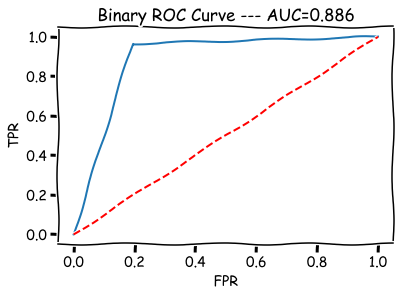

In [60]:
with plt.xkcd():  # mal pintao, y_pred
    fpr, tpr, umbrales=roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

In [62]:
import xgboost as xgb

from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample


In [66]:
df=pd.read_csv('data/diamonds.csv')
df=df.dropna()

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [67]:
df.drop('Unnamed: 0', inplace = True, axis = 1)

In [68]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [70]:
X=df.drop('price', axis=1)
y=df.price

In [71]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [72]:
from sklearn import preprocessing

In [76]:
X[['cut','color','clarity']]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [89]:
enc = preprocessing.LabelEncoder()
cut = enc.fit(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'])

In [94]:
enc = preprocessing.LabelEncoder()
color = enc.fit(['J','I','H','G','F','E','D'])

In [93]:
enc = preprocessing.LabelEncoder()
clarity = enc.fit(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

In [91]:
cut_t = cut.transform(X['cut'])

In [92]:
cut_t

array([2, 3, 1, ..., 4, 3, 2])

In [95]:
color_t = color.transform(X['color'])

In [96]:
clarity_t = clarity.transform(X['clarity'])

In [97]:
df['color'] = color_t
df['cut'] = cut_t
df['clarity'] = clarity_t

In [98]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [115]:
X=df.drop('price', axis=1)
y=df.price

In [116]:
X_train, X_test, y_train, y_test=tts(X, y)

In [117]:
space = {
    'n_estimators':hp.quniform('n_estimators',10,1000,25),
    
    'learning_rate': hp.uniform('learning_rate',0.0001,1.0),
    
    'max_depth': hp.quniform('x_max_depth', 4,16,1),
    
    'min_child_weight':hp.quniform('x_min_child', 1,10,1),
    
    'subsample': hp.uniform('x_subsample', 0.7,1),
    
    'gamma':hp.uniform('x_gamma', 0.1, 0.5),
    
    'reg_lambda':hp.uniform('x_reg_lambda', 0, 1),
}

In [118]:
def objetivo(x):
    
    modelo = xgb.XGBRegressor(
            n_estimators = int(x['n_estimators']),
            learning_rate = x['learning_rate'],
            max_depth = int(x['max_depth']),
            min_child_weight = x['min_child_weight'],
            subsample = x['subsample'],
            gamma = x['gamma'],
            reg_lambda = x['reg_lambda'],
            objective = 'reg:squarederror'
            )
    eval_set = [(X_train, y_train), (X_test,y_test)]
    
    modelo.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False) #Entrenamiento es fit()
    
    y_pred=modelo.predict(X_test) #Prediccion
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss': rmse, 'status':STATUS_OK}

In [119]:
trials_reg=Trials()

In [120]:
best=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())

100%|█████████████████████████████████████████████████| 10/10 [02:41<00:00, 16.19s/trial, best loss: 609.5933719539438]


In [138]:
best

{'learning_rate': 0.37883379009611456,
 'n_estimators': 725.0,
 'x_gamma': 0.49130699363102104,
 'x_max_depth': 11.0,
 'x_min_child': 3.0,
 'x_reg_lambda': 0.26520465390777925,
 'x_subsample': 0.8274396898483571}

In [124]:
X_train.reset_index(inplace = True)

In [127]:
X_train.drop('index',inplace = True, axis = 1)

In [129]:
y_train.reset_index(inplace = True,drop = True)

In [140]:
m=xgb.XGBRegressor(**best)
m

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.37883379009611456, max_delta_step=None,
             max_depth=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=725.0, n_jobs=None,
             num_parallel_tree=None, objective='reg:squarederror',
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None,
             x_gamma=0.49130699363102104, x_max_depth=11.0, x_min_child=3.0, ...)

In [134]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
0,1.50,2,2,5,62.4,55.0,7.31,7.25,4.54
1,1.01,4,4,2,62.7,58.0,6.36,6.34,3.98
2,2.08,4,5,5,58.9,61.0,8.35,8.36,4.92
3,0.35,2,5,2,61.3,54.0,4.51,4.56,2.78
4,0.71,3,2,4,60.1,62.0,5.77,5.74,3.46
...,...,...,...,...,...,...,...,...,...
40450,0.67,3,3,2,60.5,60.0,5.69,5.65,3.43
40451,0.31,2,1,1,60.9,55.0,4.39,4.41,2.68
40452,0.39,2,1,5,60.8,57.0,4.73,4.75,2.88
40453,1.08,2,0,3,59.1,60.0,6.70,6.76,3.98


In [135]:
y_train

0        14199
1         4743
2        18281
3          472
4         2790
         ...  
40450     1914
40451      987
40452      875
40453     5177
40454      863
Name: price, Length: 40455, dtype: int64